In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from DecisionTree_fromScratch import DecisionTree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report
)



In [21]:
df = pd.read_csv('Grades_prep.csv')
def grade_to_class(g):
    if g >= 17:
        return 0
    elif g >= 14:
        return 1
    elif g >= 10:
        return 2
    else:
        return 3

df["gradeClass"] = df["finalGrade"].apply(grade_to_class)


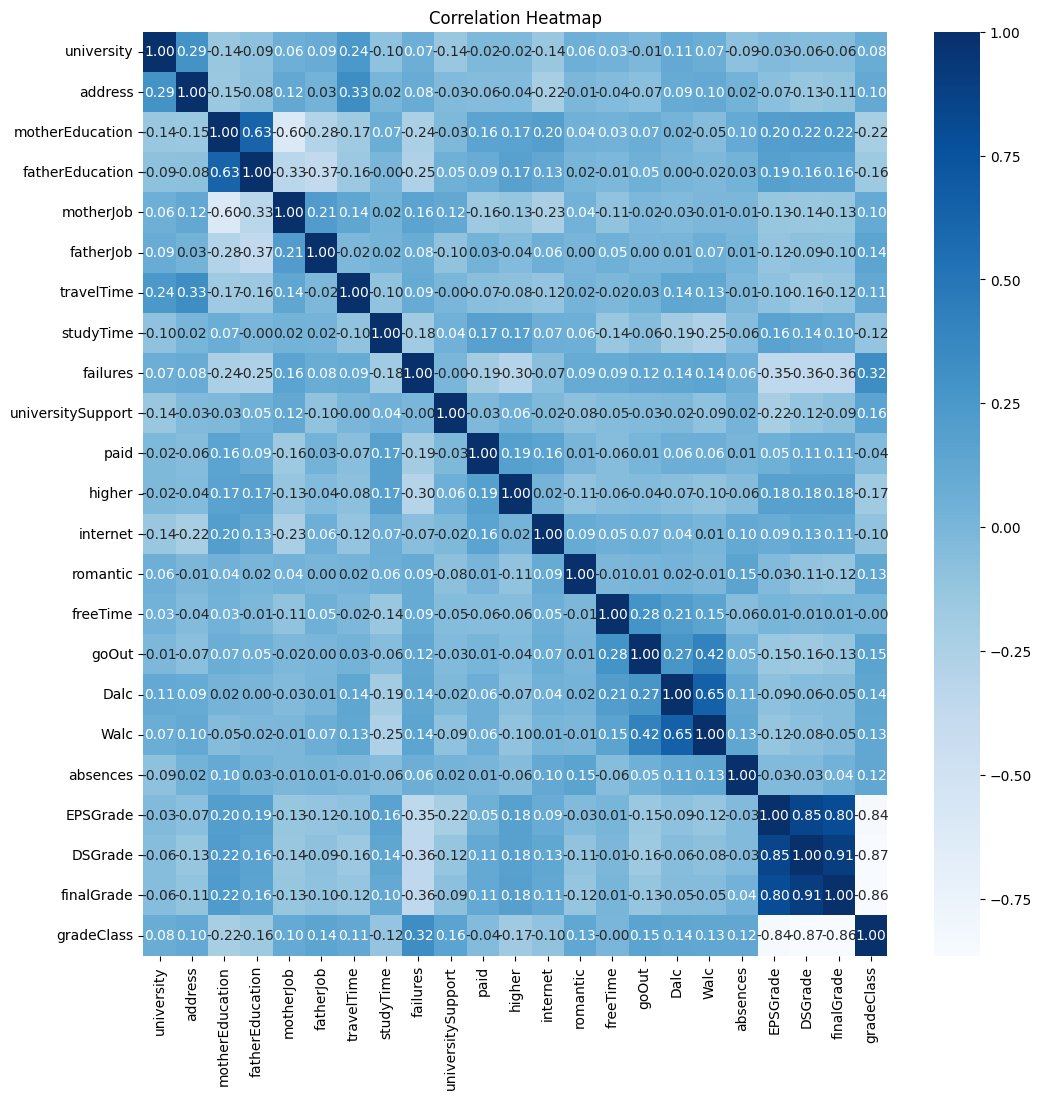

In [22]:
# correlation
corr = df.corr(method='pearson', numeric_only=True)

color_map = sns.color_palette("Blues", as_cmap=True)
plt.figure(figsize=(12, 12))
sns.heatmap(
    corr, 
    annot=True,
    fmt='.2f', 
    cmap=color_map, 
)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
#train test split


# X = df.drop(["finalGrade", "gradeClass"], axis=1)
# Y = df["gradeClass"]

X = df.drop(["finalGrade", "gradeClass"], axis=1).values
le = LabelEncoder()
Y = le.fit_transform(df["gradeClass"].values)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
#Normalization/Standardization
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
acc_nb = accuracy_score(y_test, y_pred_nb)

# Decision Tree
dt = DecisionTreeClassifier(random_state=10, max_depth=4)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgb = XGBClassifier(eval_metric='mlogloss', random_state=10)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 5],
    # 'max_features' : [2, 6, 10]
}
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test_scaled)
acc_xgb = accuracy_score(y_test, y_pred_xgb)


print(f"Naive Bayes Accuracy:      {acc_nb:.3f}")
print(f"Decision Tree Accuracy:    {acc_dt:.3f}")
print(f"Random Forest Accuracy:    {acc_rf:.3f}")
print(f"XGBoost Accuracy:          {acc_xgb:.3f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Naive Bayes Accuracy:      0.500
Decision Tree Accuracy:    0.875
Random Forest Accuracy:    0.812
XGBoost Accuracy:          0.863


In [ ]:
tree = DecisionTree(max_depth=4)
tree.fit(X_train_scaled, y_train)
y_pred_dts = tree.predict(X_test_scaled)
acc_dts = accuracy_score(y_test, y_pred_dts)
print(f"DecisionTree Scratch Accuracy:          {acc_dts:.3f}")


DecisionTree Accuracy:          0.875


In [35]:
def collect_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (Micro)": precision_score(y_true, y_pred, average='micro'),
        "Recall (Micro)": recall_score(y_true, y_pred, average='micro'),
        "F1 (Micro)": f1_score(y_true, y_pred, average='micro'),
        "Precision (Macro)": precision_score(y_true, y_pred, average='macro'),
        "Recall (Macro)": recall_score(y_true, y_pred, average='macro'),
        "F1 (Macro)": f1_score(y_true, y_pred, average='macro'),
        "Precision (Weighted)": precision_score(y_true, y_pred, average='weighted'),
        "Recall (Weighted)": recall_score(y_true, y_pred, average='weighted'),
        "F1 (Weighted)": f1_score(y_true, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_true, y_pred)
    }

In [36]:
results = []
results.append(collect_metrics(y_test, y_pred_nb, 'Naive Bayes'))
results.append(collect_metrics(y_test, y_pred_dt, 'Decision Tree'))
results.append(collect_metrics(y_test, y_pred_rf, 'Random Forest'))
results.append(collect_metrics(y_test, y_pred_xgb,'XGBoost'))
results.append(collect_metrics(y_test, y_pred_xgb, 'DecisionTree Scratch'))

df_results  = pd.DataFrame(results)
print(df_results.round(3))

                  Model  Accuracy  Precision (Micro)  Recall (Micro)  \
0           Naive Bayes     0.500              0.500           0.500   
1         Decision Tree     0.875              0.875           0.875   
2         Random Forest     0.812              0.812           0.812   
3               XGBoost     0.862              0.862           0.862   
4  DecisionTree Scratch     0.862              0.862           0.862   

   F1 (Micro)  Precision (Macro)  Recall (Macro)  F1 (Macro)  \
0       0.500              0.430           0.423       0.390   
1       0.875              0.904           0.894       0.887   
2       0.812              0.834           0.767       0.791   
3       0.862              0.901           0.851       0.868   
4       0.862              0.901           0.851       0.868   

   Precision (Weighted)  Recall (Weighted)  F1 (Weighted)  \
0                 0.637              0.500          0.542   
1                 0.901              0.875          0.873   

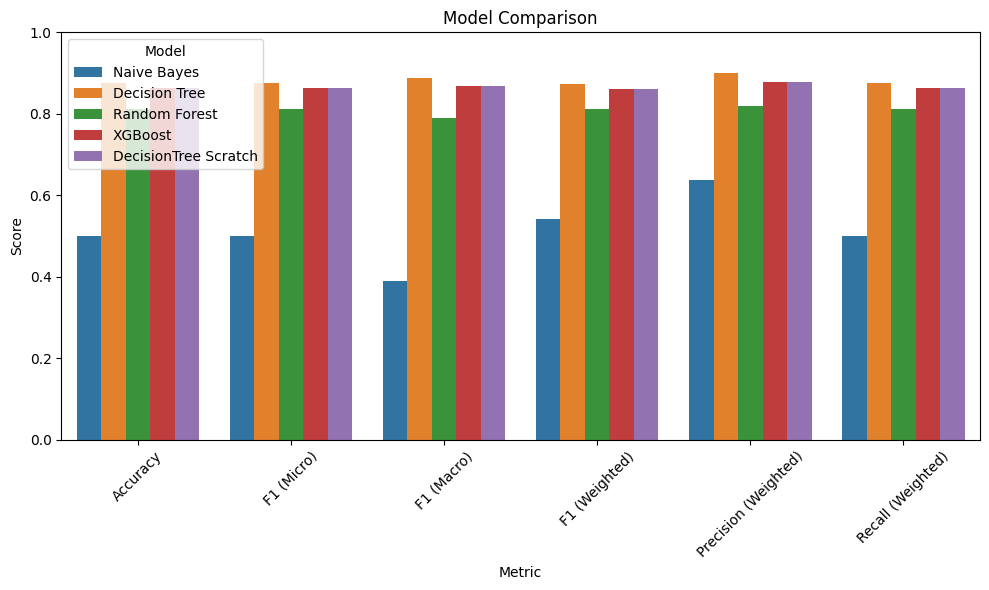

In [37]:
melted = pd.melt(
    df_results,
    id_vars='Model',
    value_vars=[
        "Accuracy", "F1 (Micro)", "F1 (Macro)", "F1 (Weighted)",
        "Precision (Weighted)", "Recall (Weighted)"
    ],
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Metric', y='Score', hue='Model')
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

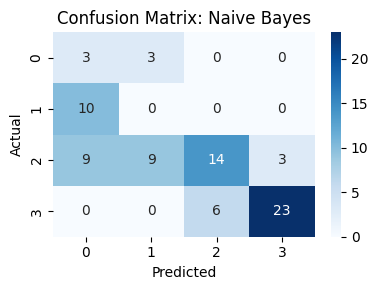

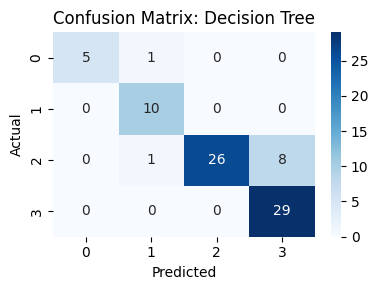

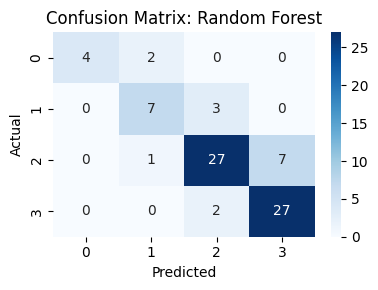

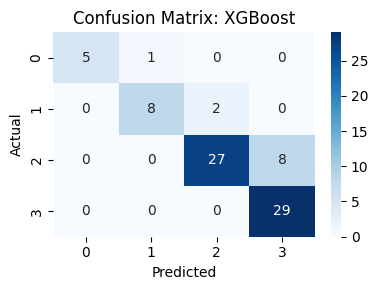

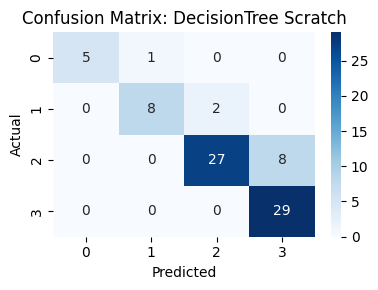

In [38]:
for res in results:
    plt.figure(figsize=(4, 3))
    sns.heatmap(res["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {res['Model']}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()